# Bagging 
1. Fitra Ahya Mubarok *23/529994/PPA/06705*
2. Daniel Eduardus Kristianto *23/530253/PPA/06723*
3. Sugeng Dwi Cahyono *23/531008/PPA/06757*


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [139]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [140]:
df_train = pd.read_csv('/home/jovyan/datasets/titanic/train.csv')

df = df_train

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


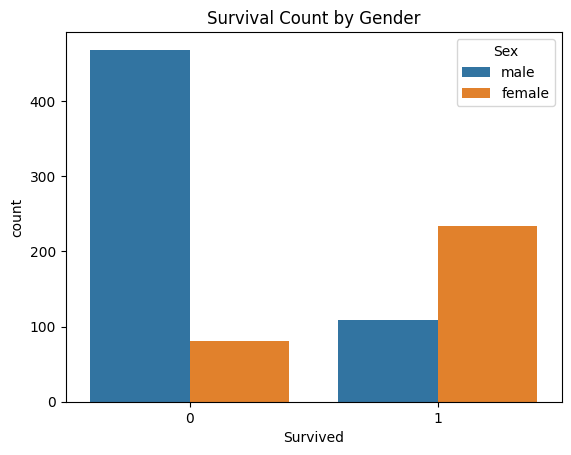

In [142]:
# Visualisasi jumlah penumpang yang selamat berdasarkan jenis kelamin
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()


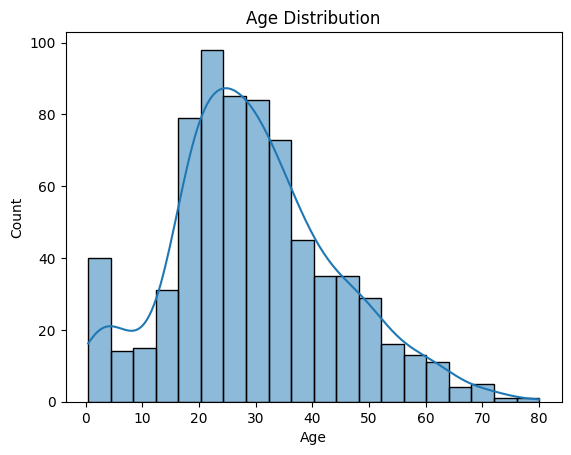

In [143]:

# Visualisasi distribusi usia penumpang
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

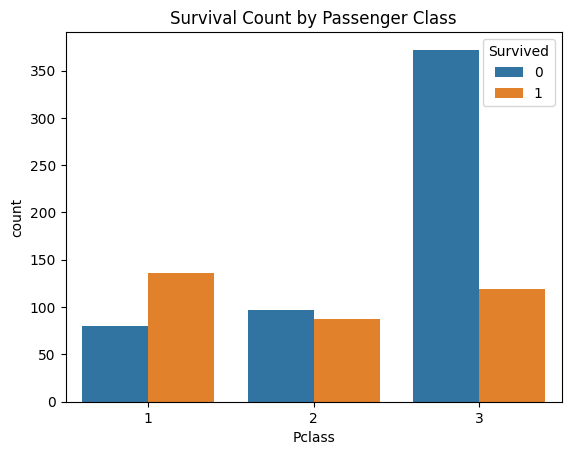

In [144]:

# Visualisasi hubungan antara kelas penumpang dan kelangsungan hidup
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Mengisi nilai yang hilang
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Mengubah fitur kategorikal menjadi numerik
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Memilih fitur dan target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
def bagging_process(X_train, y_train, subset_size):
    # Memastikan subset_size tidak lebih besar dari ukuran dataset asli
    if subset_size > len(X_train):
        raise ValueError("subset_size is larger than the training set size")
        
    # Menghasilkan indeks sampel acak dengan penggantian
    indexes = np.random.choice(X_train.index, size=subset_size, replace=True)
    # Membuat bootstrap sample untuk fitur dan target
    bag_X = X_train.loc[indexes]
    bag_y = y_train.loc[indexes]
    return (bag_X, bag_y)


In [147]:
# Bagging

bags = []
global bagging_clf 

def bagging(bag_size: int):
    for i in range(bag_size):
        X_train, y_train = bagging_process(X, y, subset_size=600)
        bagging_clf = BaggingClassifier(
            DecisionTreeClassifier(),
            n_estimators=3,  # Jumlah model dalam ensemble
            random_state=42,
            max_samples=200
        )
        bagging_clf.fit(X_train, y_train)
        bags.append(
            bagging_clf.predict(X_test)
        )
    return bags


In [148]:
bag_results = bagging(bag_size=111)

In [149]:
mojority_test = 0

def majority_vote(data):
    # Inisialisasi list untuk menyimpan hasil vote
    result = []
    # Mendapatkan jumlah kolom
    num_columns = len(data[0])
    
    # Looping melalui setiap kolom
    for col in range(num_columns):
        # Menghitung jumlah 0 dan 1 di kolom ini
        count_0 = 0
        count_1 = 0
        for row in data:
            if row[col] == 0:
                count_0 += 1
            else:
                count_1 += 1
        
        # Menentukan mayoritas dan menambahkan ke hasil
        if count_0 > count_1:
            result.append(0)
        else:
            # Jika count_1 lebih besar atau sama dengan count_0, kita memilih 1
            result.append(1)
    
    return result


In [150]:
results = majority_vote(bag_results)

In [151]:
print("Accuracy :",accuracy_score(results, y_pred))

Accuracy : 0.9497206703910615
